In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
column_names = [f'feature_{i}' for i in range(57)] + ['spam']

data = pd.read_csv(r'C:\MySpamFilter\raw_data\spambase.data', names=column_names)

data_copy = data.copy()

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(data_copy.drop(columns=['spam']))

data_scaled = pd.DataFrame(features_scaled, columns = column_names[:-1])
data_scaled['spam'] = data_copy['spam']

data_scaled['spam'] = data_copy['spam']

print(data_scaled.head())

x = data_scaled[column_names [:-1]]
y = data_scaled['spam']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Training set shape:", X_test.shape)


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.000000   0.044818   0.125490        0.0      0.032   0.000000   
1   0.046256   0.019608   0.098039        0.0      0.014   0.047619   
2   0.013216   0.000000   0.139216        0.0      0.123   0.032313   
3   0.000000   0.000000   0.000000        0.0      0.063   0.000000   
4   0.000000   0.000000   0.000000        0.0      0.063   0.000000   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0   0.000000   0.000000   0.000000   0.000000  ...    0.000000    0.000000   
1   0.028886   0.006301   0.000000   0.051705  ...    0.000000    0.013536   
2   0.026135   0.010801   0.121673   0.013751  ...    0.002281    0.014664   
3   0.042641   0.056706   0.058935   0.034653  ...    0.000000    0.014048   
4   0.042641   0.056706   0.058935   0.034653  ...    0.000000    0.013843   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0         0.0    0.023955  

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 89.69%

Confusion Matrix:
[[510  21]
 [ 74 316]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       531
           1       0.94      0.81      0.87       390

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



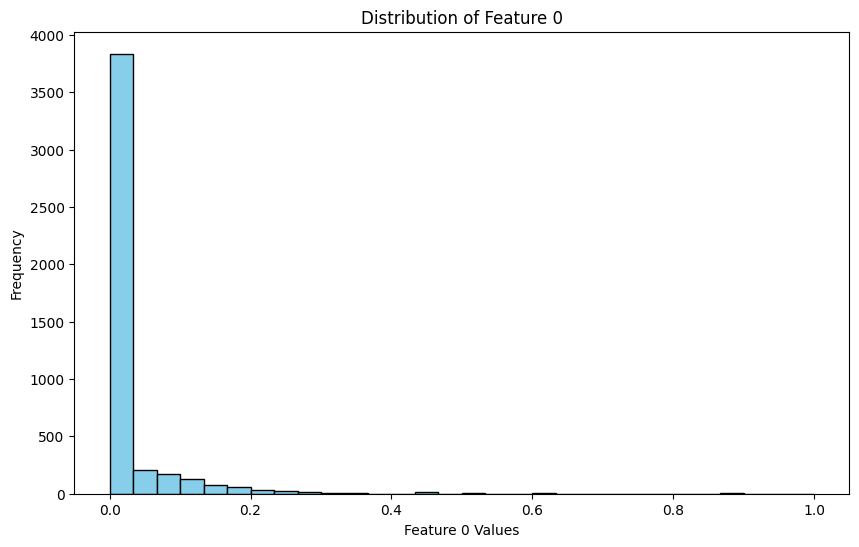

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(data_scaled['feature_0'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Feature 0')
plt.xlabel('Feature 0 Values')
plt.ylabel('Frequency')
plt.show()

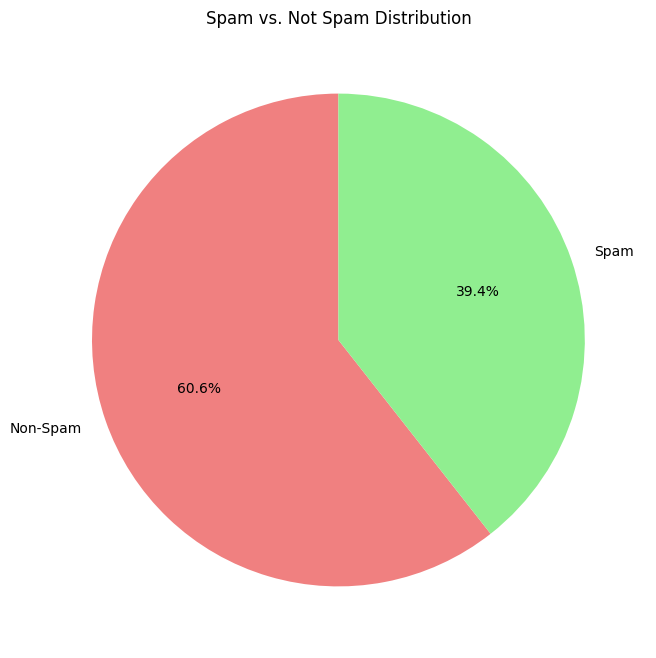

In [5]:
spam_counts=data_scaled['spam'].value_counts()
labels=['Non-Spam', 'Spam']

plt.figure(figsize=(8,8))
plt.pie(spam_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Spam vs. Not Spam Distribution')
plt.show()

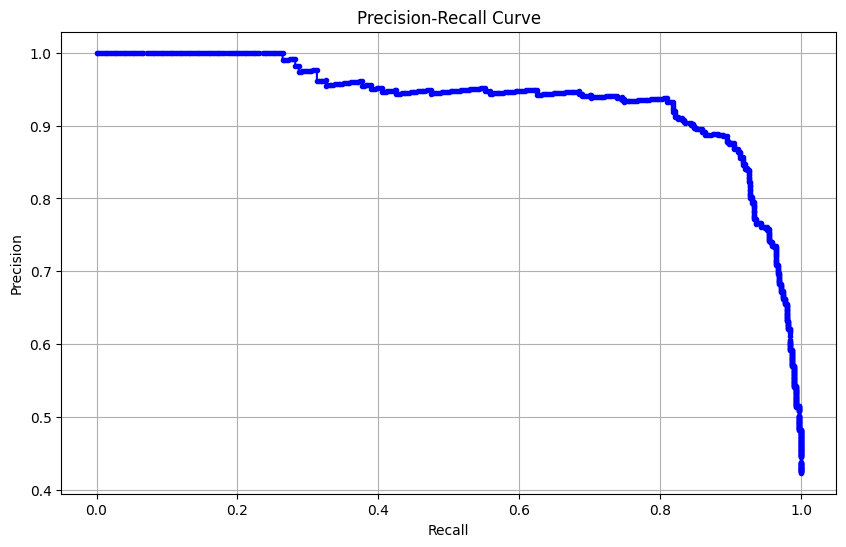

In [6]:
from sklearn.metrics import precision_recall_curve

y_pred_prob = model.predict_proba(X_test)[:,1]

precision,recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(10,6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Example preprocessing and vectorization function
def preprocess_and_vectorize(email_text):
    # Basic preprocessing (e.g., lowercasing)
    email_text = email_text.lower()

    # Create a vectorizer similar to how the original data was processed
    vectorizer = CountVectorizer(max_features=57)  # Adjust max_features as needed
    vectorizer.fit(data_copy.drop(columns=['spam']).columns)

    # Transform the input email text to feature vectors
    email_vector = vectorizer.transform([email_text]).toarray().flatten()

    # Scale the feature vector to match training scale
    email_vector_scaled = scaler.transform([email_vector])
    return email_vector_scaled[0]

In [ ]:
import numpy as np
import pandas as pd
import random

# Function to display the menu
def display_menu():
    print("\n### Spam Email Detection ###")
    print("1. Enter values manually")
    print("2. Use random values for all features")
    print("3. Exit")
    print("----------------------------")

# Function to collect manual input with validation
def manual_input():
    print("\nYou chose to enter values manually.")
    user_input = []
    for i in range(57):
        while True:
            try:
                value = input(f"Enter value for feature_{i} (between 0 and 1, or press Enter to use default 0): ")
                value = float(value) if value else 0

                # Input validation
                if 0 <= value <= 1:
                    user_input.append(value)
                    break
                else:
                    print("Invalid input. Please enter a value between 0 and 1.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")
    return user_input

# Function to generate random input with floating-point values
def random_input():
    print("\nGenerating random values for all features.")
    user_input = [random.uniform(0, 1) for _ in range(57)]  # Random float between 0 and 1 for each feature
    return user_input

# Main loop for the user interface
while True:
    display_menu()
    choice = input("Choose an option (1/2/3): ").strip()

    if choice == '1':
        user_input = manual_input()
    elif choice == '2':
        user_input = random_input()
    elif choice == '3':
        print("Exiting the program. Goodbye!")
        break
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")
        continue

    # Convert input to DataFrame with column names
    user_input_df = pd.DataFrame([user_input], columns=column_names[:-1])

    # Scale the input
    user_input_scaled = scaler.transform(user_input_df)

    # Convert back to DataFrame to retain column names for prediction
    user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=column_names[:-1])

    # Make prediction
    prediction = model.predict(user_input_scaled_df)

    # Get prediction probabilities for the positive class (spam)
    prediction_proba = model.predict_proba(user_input_scaled_df)

    # Display the result with confidence score
    print("\n### Prediction Result ###")
    if prediction[0] == 1:
        print(f"The email is classified as: **Spam** (Confidence: {prediction_proba[0][1] * 100:.2f}%)")
        
    else:
        print(f"The email is classified as: **Non-Spam** (Confidence: {prediction_proba[0][0] * 100:.2f}%)")
        
    print("----------------------------")





### Spam Email Detection ###
1. Enter values manually
2. Use random values for all features
3. Exit
----------------------------
